# Exploratory Data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
exercise = pd.read_csv("exercise.csv")
calories = pd.read_csv("calories.csv")
df = pd.concat([exercise, calories], axis=1)
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,User_ID,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,14733363,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,14861698,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,11179863,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,16180408,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,17771927,35.0


## Dropping User_ID column and saving the complete dataset

In [3]:
df = df.drop(['User_ID'], axis=1)
df.to_csv('Complete.csv')
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [4]:
df.isnull().sum()

Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [5]:
df.describe()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


# Helper functions

In [6]:
def plot_hist(df, col, title, labelx, b):
    plt.hist(df[col], bins=b, edgecolor ='black', color ='#3456b7')
    plt.title(title)
    plt.xlabel(labelx)
    plt.ylabel('Count')
    plt.show()

def plot_bar(labels, values, xlabel, ylabel, title):
    plt.bar(labels, values, edgecolor ='black', color='#3456b7')          
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()


def lineplot(x, y, df, title, xlabel, ylabel):
    sns.lineplot(x=x, y=y, data=df, color='#ff0000')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

def scatterplot(x, y, title, xlabel, ylabel):
    plt.scatter(x, y, color='#3456b7')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

# **Disturbutions**

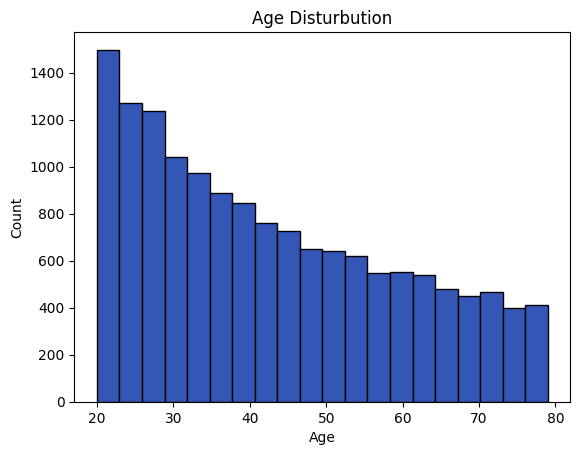

In [7]:
plot_hist(df=df, col='Age', title="Age Disturbution", labelx='Age', b=20)

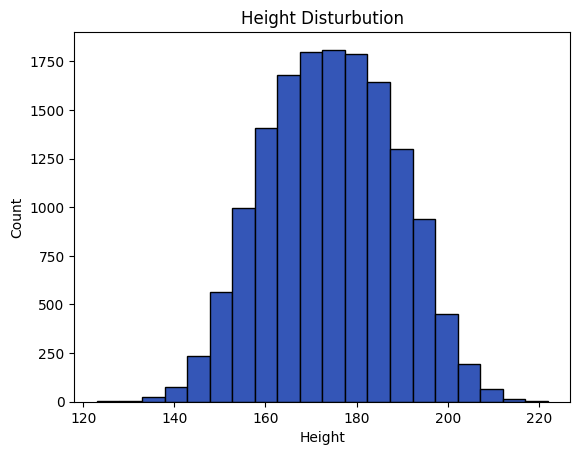

In [8]:
plot_hist(df=df, col='Height', title='Height Disturbution', labelx='Height', b=20)

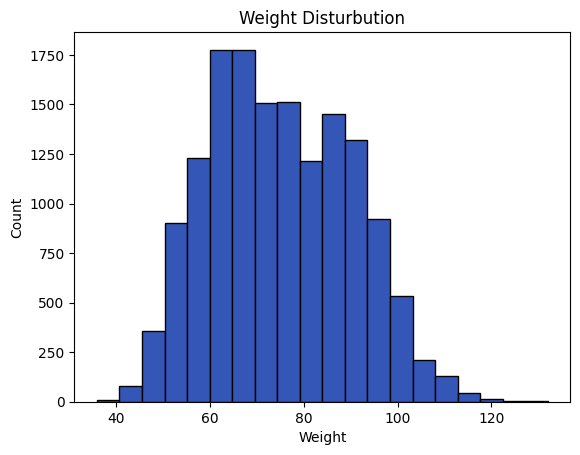

In [9]:
plot_hist(df= df, col='Weight', title='Weight Disturbution', labelx='Weight', b = 20)

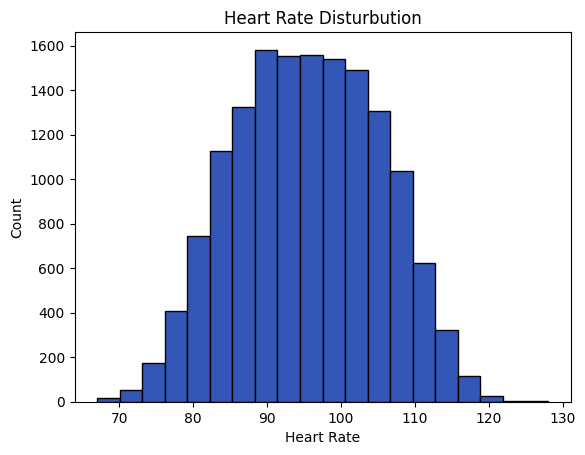

In [10]:
plot_hist(df = df, col='Heart_Rate', title = 'Heart Rate Disturbution', 
        labelx = 'Heart Rate', b = 20)

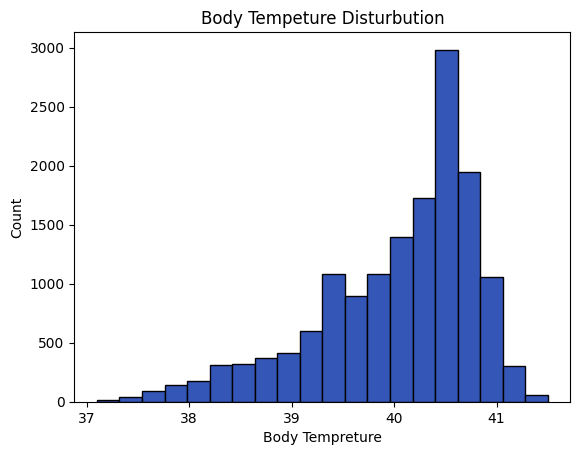

In [11]:
plot_hist(df=df, col='Body_Temp',
        title= 'Body Tempeture Disturbution',
        labelx= 'Body Tempreture',
        b = 20)

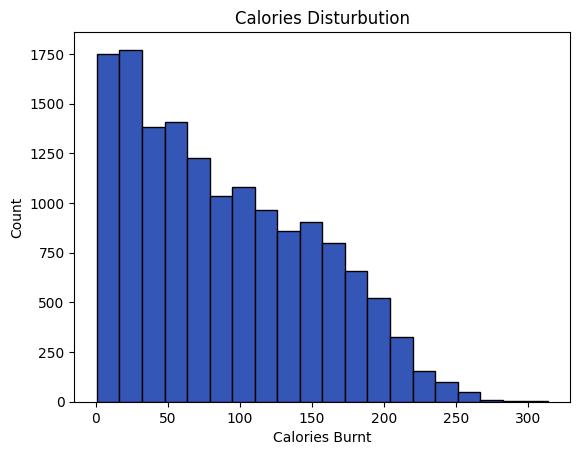

In [12]:
plot_hist(df=df, col='Calories', title="Calories Disturbution", labelx='Calories Burnt', b = 20)

## Note

We can see that there are alot of people who burnt **0** calories, did they do any exercise?

if so , for how long?

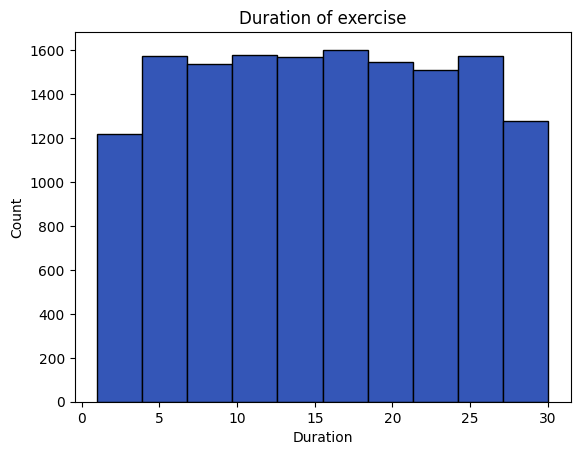

In [13]:
plot_hist(df=df, col='Duration', title='Duration of exercise', labelx='Duration',b=10)

# Note 

around 1200 have an exercise duration of 0- 5 minutes. \
are these the same ones that burn calories?

## ---------------------------------

#### **Scatter** plots to visualize the coorelation between (Heart Rate / Body Tempreture / Exercise Duration) with the target (Calories burnt)

### Duration 

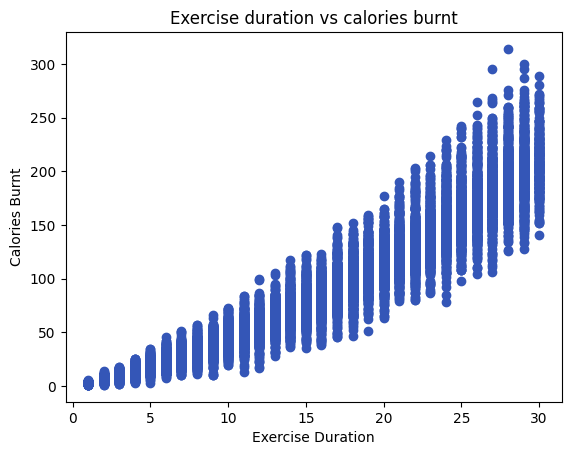

In [14]:
scatterplot(x = df["Duration"], 
            y = df['Calories'],
            title='Exercise duration vs calories burnt',
            xlabel='Exercise Duration',
            ylabel='Calories Burnt')

# Note 

Does the **type** of exercise , play a major role in defining the amount of calories burnt?

This is because a sample of the population does not actually burn alot of calories. \
while still maintaining approximately 0 - 5 minutes of exercise duration

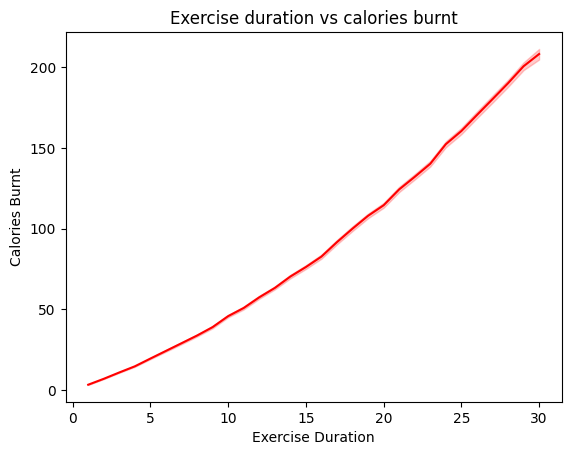

In [15]:
lineplot(x = "Duration", 
        y = 'Calories',
        df=df,
        title='Exercise duration vs calories burnt',
        xlabel='Exercise Duration',
        ylabel='Calories Burnt')

### Body Tempreture

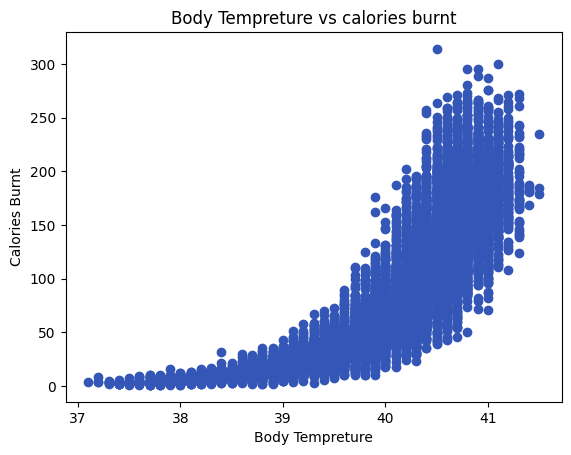

In [16]:

scatterplot(x = df['Body_Temp'], 
            y = df['Calories'],
            title='Body Tempreture vs calories burnt',
            xlabel='Body Tempreture',
            ylabel='Calories Burnt')

## Note


What body tempreture degree do you have to reach, to start burning good amounts of calories? 

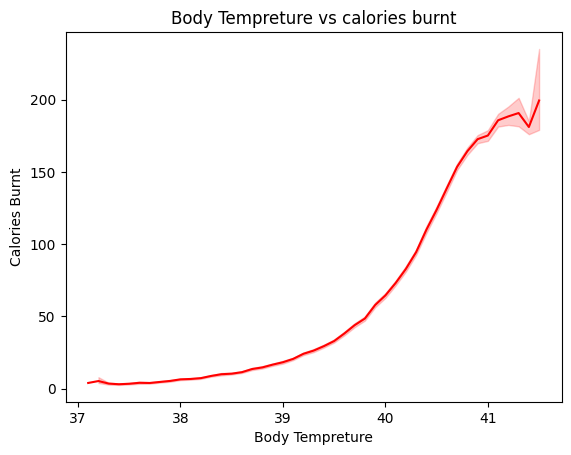

In [17]:
lineplot( x = 'Body_Temp', 
          y = df['Calories'],
          title='Body Tempreture vs calories burnt',
          xlabel='Body Tempreture',
          ylabel='Calories Burnt',
          df=df)

### Heart Rate

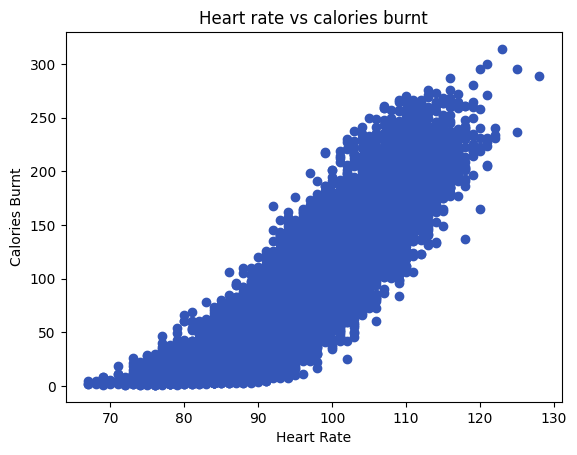

In [18]:
scatterplot(x = df['Heart_Rate'], 
            y = df['Calories'],
            title='Heart rate vs calories burnt',
            xlabel='Heart Rate',
            ylabel='Calories Burnt')

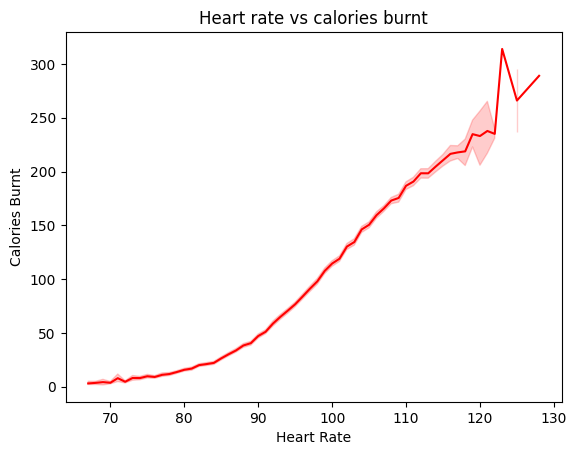

In [19]:
lineplot(x = 'Heart_Rate', 
            y = 'Calories',
            title='Heart rate vs calories burnt',
            xlabel='Heart Rate',
            ylabel='Calories Burnt',
            df=df)

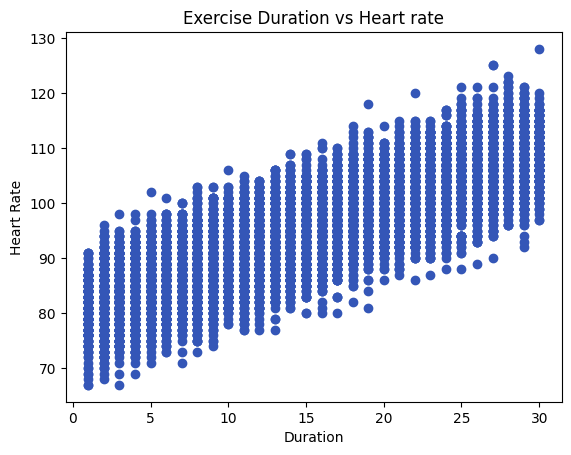

In [20]:
scatterplot(x = df['Duration'], 
            y = df['Heart_Rate'],
            title='Exercise Duration vs Heart rate',
            xlabel='Duration',
            ylabel='Heart Rate')

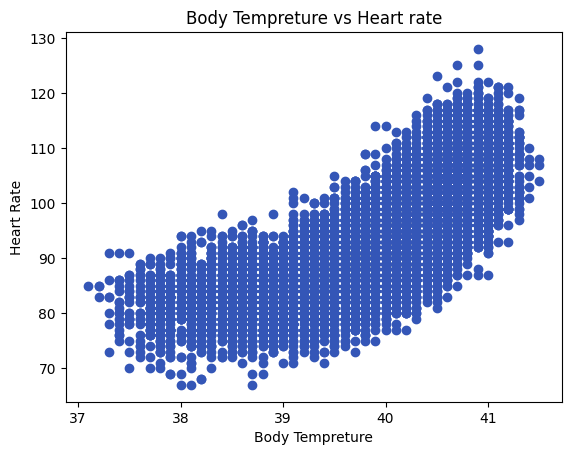

In [21]:
scatterplot(x = df['Body_Temp'], 
            y = df['Heart_Rate'],
            title='Body Tempreture vs Heart rate',
            xlabel='Body Tempreture',
            ylabel='Heart Rate')

## Note

There seems to be outliers for people with a body tempreture lower than ~ 37.4

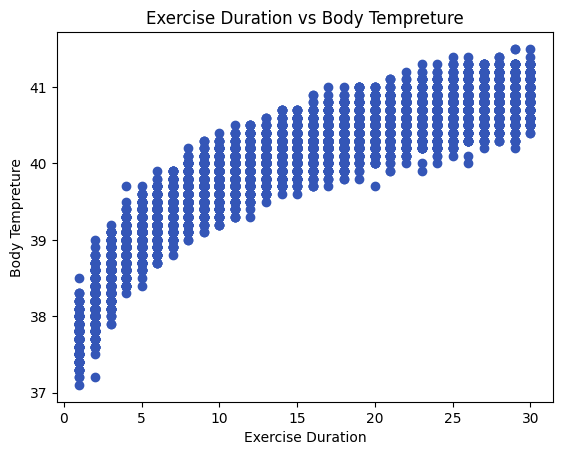

In [22]:

scatterplot(x = df['Duration'], 
            y =  df['Body_Temp'],
            title='Exercise Duration vs Body Tempreture',
            xlabel='Exercise Duration',
            ylabel='Body Tempreture')


# Average Statistics between men and women

In [23]:
averages = df.groupby(['Gender'])[['Calories', 'Duration', 'Body_Temp', "Weight", 'Age']].mean()
averages

,Calories,Duration,Body_Temp,Weight,Age
Gender,,,,,
female,88.153052,15.502185,40.019833,63.274460,42.735469
male,90.945750,15.559420,40.031153,86.825702,42.844904


In [24]:
averages.iloc[0][0]

88.1530517675096

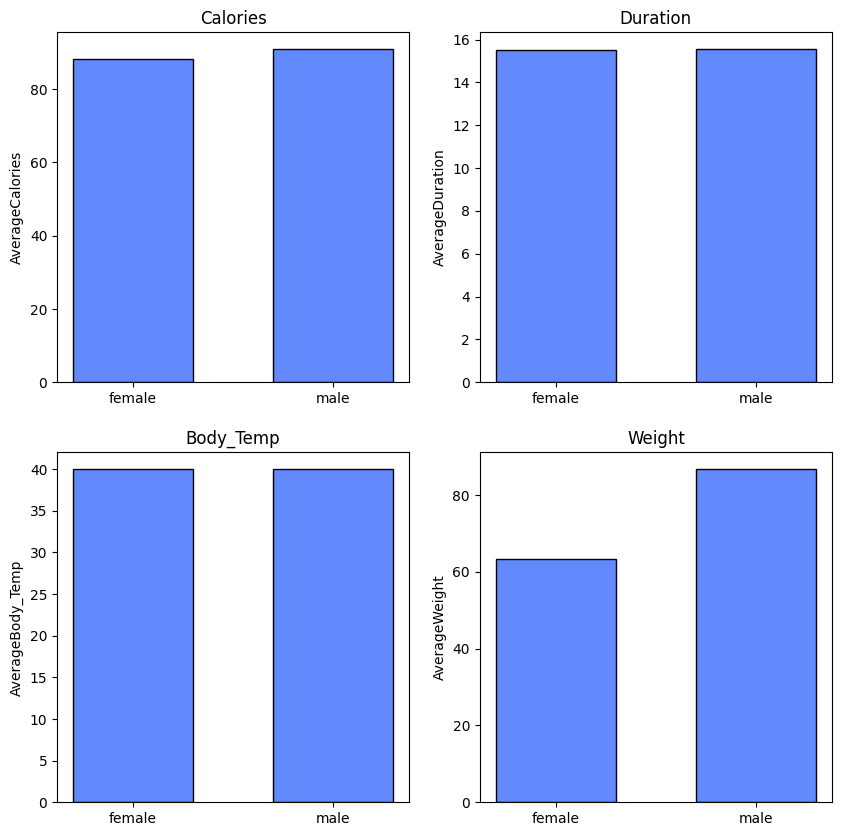

In [38]:
fig , ax = plt.subplots(nrows=2, ncols=2)
row = 0
col = 0
labels =[averages.index[0], averages.index[1]]

map = {0: (0,0), 1: (0,1), 2:(1,0), 3:(1,1)}

fig.set_figheight(10)
fig.set_figwidth(10)
for col in range(4):
    (index_, col_fig) = map[col]
    ax[index_, col_fig].bar(
        labels,
        [averages.iloc[0][col], averages.iloc[1][col]],
        width=0.6,
        edgecolor ='black',
        color='#638AFD',
        align="center"
    )
            
    ax[index_, col_fig].set_title(f"{averages.columns[col]}")
    ax[index_, col_fig].set_ylabel(f"Average{ averages.columns[col]}", )


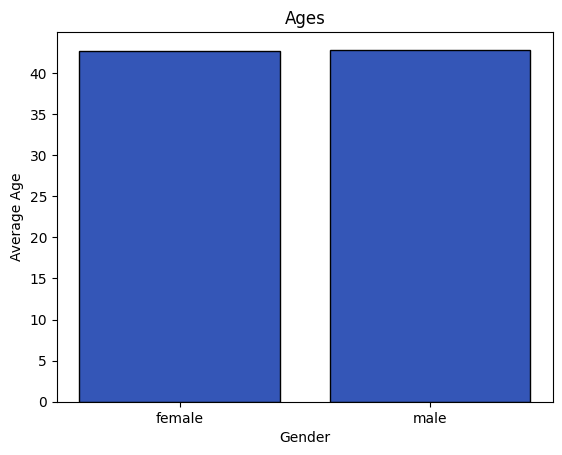

In [26]:
plot_bar(
    labels = labels,
    values = [averages.iloc[0]["Age"], averages.iloc[1]["Age"]],
    xlabel = "Gender",
    ylabel = "Average Age",
    title = "Ages"
)

# BMI Calculation

In [27]:
df['BMI'] = df['Weight'] / ((df["Height"]/100) ** 2)

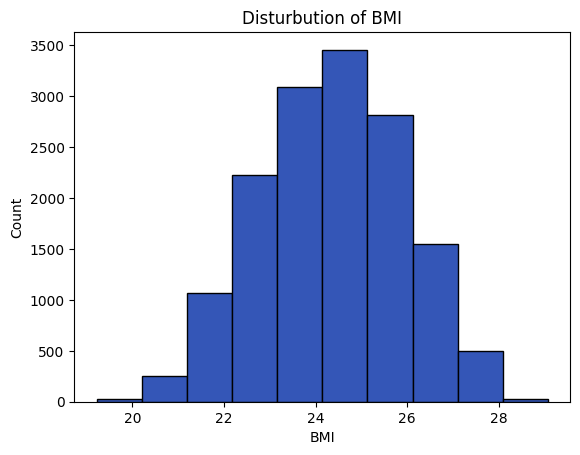

In [28]:
plot_hist(df=df, col='BMI', title='Disturbution of BMI', labelx='BMI',b=10)

# Average statistics between weight groups

In [29]:
df["Weight Status"] = np.where((df.BMI <= 18.5), "Underweight",
                       np.where((df.BMI > 18.5) & (df.BMI <= 24.9), "Normal",
                       np.where((df.BMI > 25.0) & (df.BMI < 29.9), "Overweight",
                       np.where((df.BMI > 30.0), "Obese", None))))
      

In [30]:
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,BMI,Weight Status
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0,26.038781,Overweight
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0,21.773842,Normal
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0,24.655910,Normal
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0,22.159109,Normal
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0,24.456063,Normal


In [31]:
df["Weight Status"].value_counts()

Normal        9349
Overweight    5179
Name: Weight Status, dtype: int64

In [49]:
weights = df.groupby(['Weight Status'])[['Calories', 'Duration', 'Body_Temp', 'Age', "Heart_Rate"]].mean()
weights

,Calories,Duration,Body_Temp,Age,Heart_Rate
Weight Status,,,,,
Normal,86.918066,15.499840,40.021371,40.249011,95.439191
Overweight,94.205445,15.591041,40.034061,47.224368,95.659008


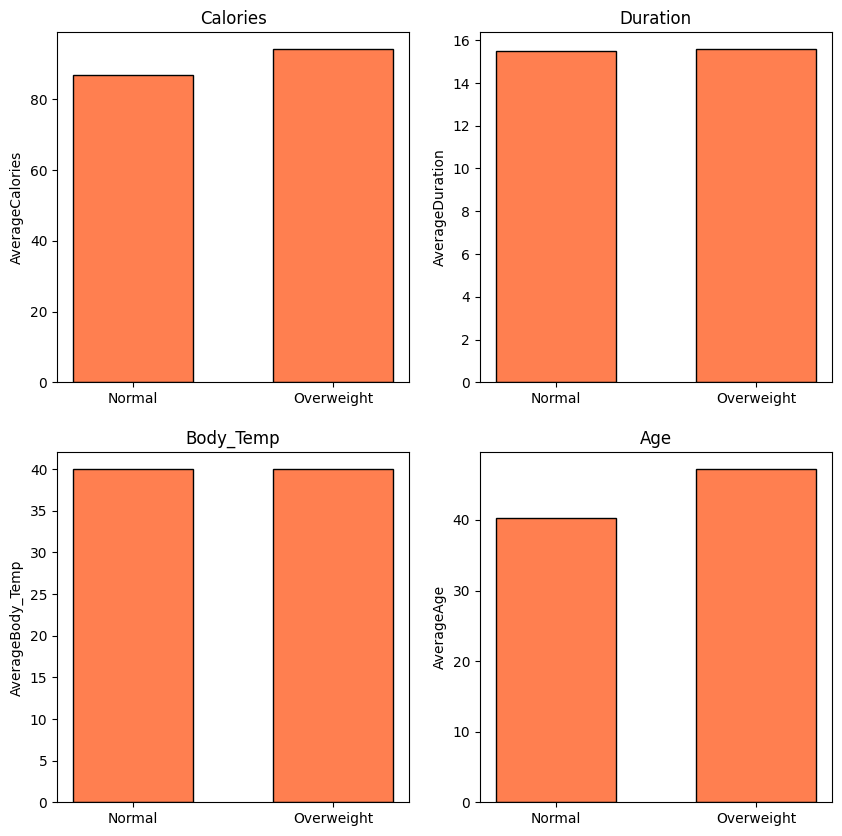

In [42]:
fig , ax = plt.subplots(nrows=2, ncols=2)
row = 0
col = 0
labels =[weights.index[0], weights.index[1]]

map = {0: (0,0), 1: (0,1), 2:(1,0), 3:(1,1)}

fig.set_figheight(10)
fig.set_figwidth(10)
for col in range(4):
    (index_, col_fig) = map[col]
    ax[index_, col_fig].bar(
        labels,
        [weights.iloc[0][col], weights.iloc[1][col]],
        width=0.6,
        edgecolor ='black',
        color='#FF7F50',
        align="center",
    )
            
    ax[index_, col_fig].set_title(f"{weights.columns[col]}")
    ax[index_, col_fig].set_ylabel(f"Average{ weights.columns[col]}", )

In [45]:
gender= pd.DataFrame(df.groupby(['Weight Status'], as_index=False)["Gender"].value_counts())



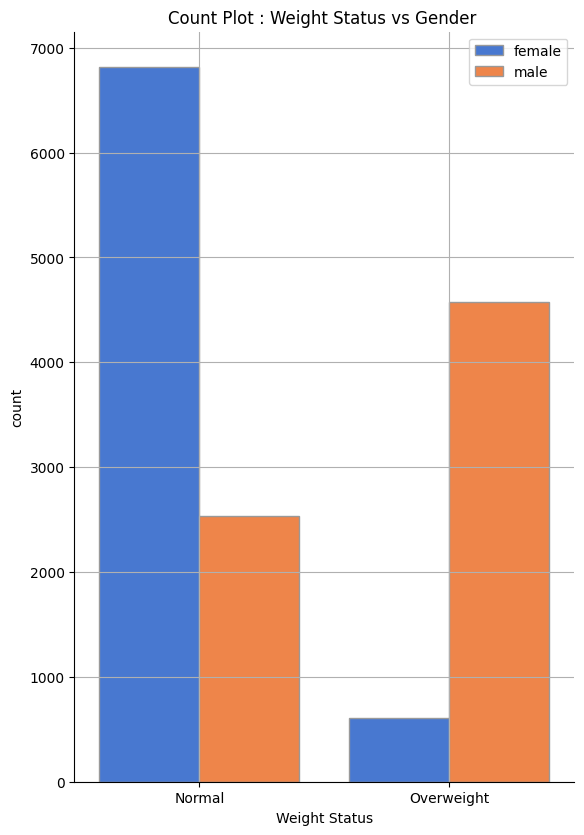

In [48]:
sns.catplot( data=gender, x='Weight Status', y = 'count', hue='Gender', kind='bar', palette='muted', edgecolor='0.6', saturation=1, legend=None)
plt.title("Count Plot : Weight Status vs Gender ") 
plt.grid()
plt.legend(loc='upper right')
plt.subplots_adjust(left=0.5, bottom=0.0, right=1.5, top=1.5, wspace=0.4, hspace=5)
